In [1]:
import numpy as np

import os

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns
import vapeplot
vapeplot.set_palette('vaporwave')

In [2]:
def labels_to_counts(labels, time_axis=0):
    onehot = np.zeros((labels.size, n_classes), dtype=int)
    onehot[np.arange(labels.size), labels] = 1
    return onehot.cumsum(axis=time_axis)


data = 'square'
policies = [
    'ens jensen greedy',
    'greedy',
    'round robin greedy'
]
linestyles = [
    '-',
    '--',
    'dotted'
]
assert len(policies) == len(linestyles)

n_exps = 20
n_classes = 6
budget = 200

basepath = os.path.join('../../data/results', data)


class_counts = -1 * np.ones(
    (len(policies), n_exps, budget, n_classes), dtype=int
)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        labels = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__queried_labels__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        class_counts[p_ind, i, :] = labels_to_counts(labels)
        
assert np.all(class_counts != -1)

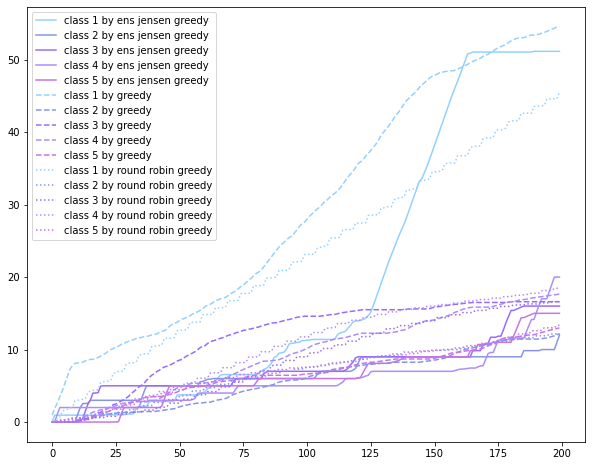

In [3]:
plt.figure(figsize=(10, 8))

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    for c in range(1, n_classes):
        plt.plot(
            class_counts[i, :, :, c].mean(axis=0), 
            linestyle=style, c=f'C{c - 1}', label=f'class {c} by {policy}'
        )
        
plt.legend();